In [5]:
!pip install scikit-learn opencv-python mediapipe numpy matplotlib

In [2]:
import cv2 
import mediapipe as mp
import numpy as np
import os

def face_m(image):
   
    height, width, _=image.shape
    rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
 
    mp_face_mesh=mp.solutions.face_mesh
    face_mesh=mp_face_mesh.FaceMesh()
    left_eye_down=[263,249,390,373,374,380,381,382,362]
    left_eye_high=[398,384,385,386,387,388,381,466]
    right_eye_down=[33,7,163,144,145,153,154,155,133]
    right_eye_high=[246,161,160,159,158,157,173]
    left_eyebrow_down=[285,295,282,283,276]
    left_eyebrow_up=[336,296,334,293,300]
    rigt_eyebrow_down=[46,53,52,65,55]
    rigt_eyebrow_up=[70,63,105,66,107]
    lips=[61,146,91,181,84,17,314,405,321,375,291,409,270,269,267,0,37,39,40,185]
    mounth= [78,191,80,81,82,13,312,311,310,415,308,95,88,178,87,14,317,402,318,324]
    result=face_mesh.process(rgb_image)
    image_landmarks=[]
    x_s=[]
    y_s=[]
    z_s=[]
    for facial_landmarks in result.multi_face_landmarks:
        for i in left_eye_down:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in right_eye_down:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in left_eye_high:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in right_eye_high:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in left_eyebrow_down:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in left_eyebrow_up:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in rigt_eyebrow_down:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in rigt_eyebrow_up:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in lips:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
        for i in mounth:
            pt1=facial_landmarks.landmark[i]
            x_s.append(pt1.x)
            y_s.append(pt1.y)
            z_s.append(pt1.z)
    for j in range(len(x_s)):
            image_landmarks.append(x_s[j] - min(x_s))
            image_landmarks.append(y_s[j] - min(y_s))
            image_landmarks.append(z_s[j] - min(z_s))
    return image_landmarks


In [3]:
data_dir = './data'

output = []
for emotion_indx, emotion in enumerate(sorted(os.listdir(data_dir))):
    for image_path_ in os.listdir(os.path.join(data_dir, emotion)):
    
        image_path = os.path.join(data_dir, emotion, image_path_)
        print(image_path)
        image=cv2.imread(image_path)
        face_landmarks = face_m(image)

        if len(face_landmarks) == 279:
            face_landmarks.append(int(emotion_indx))
            output.append(face_landmarks)

np.savetxt('data.txt', np.asarray(output))

./data\bad\IMG_20240505_141804.jpg
./data\bad\IMG_20240505_141807.jpg
./data\bad\IMG_20240505_141811.jpg
./data\bad\IMG_20240505_141814.jpg
./data\bad\IMG_20240505_141816.jpg
./data\bad\IMG_20240505_141818.jpg
./data\bad\IMG_20240505_141820.jpg
./data\bad\IMG_20240505_141822.jpg
./data\bad\IMG_20240505_141825.jpg
./data\bad\IMG_20240505_141827.jpg
./data\bad\IMG_20240505_141833.jpg
./data\bad\IMG_20240505_141838.jpg
./data\bad\IMG_20240505_141840.jpg
./data\bad\IMG_20240505_141843.jpg
./data\bad\IMG_20240505_141845.jpg
./data\bad\IMG_20240505_141856.jpg
./data\bad\IMG_20240505_141907.jpg
./data\bad\IMG_20240505_141911.jpg
./data\bad\IMG_20240505_141913.jpg
./data\bad\IMG_20240505_141916.jpg
./data\bad\IMG_20240505_141917.jpg
./data\bad\IMG_20240505_141918.jpg
./data\bad\IMG_20240505_141920.jpg
./data\bad\IMG_20240505_141934.jpg
./data\bad\IMG_20240505_141937.jpg
./data\bad\IMG_20240505_142030.jpg
./data\bad\IMG_20240505_142033.jpg
./data\bad\IMG_20240505_142047.jpg
./data\bad\IMG_20240

Accuracy: 78.95%
[[6 3]
 [1 9]]


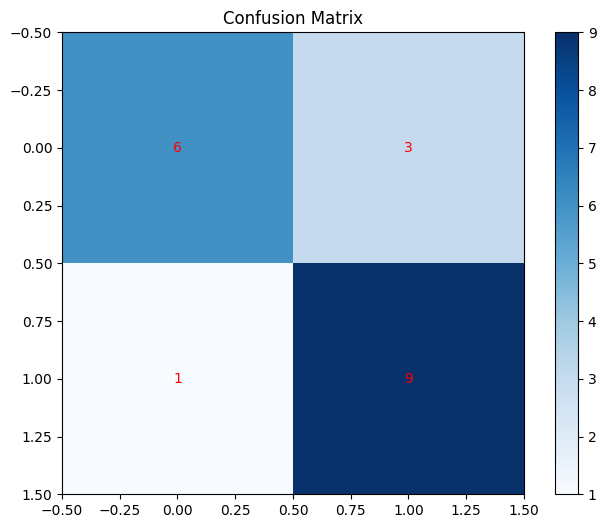

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


data_file = "data.txt"
data = np.loadtxt(data_file)


X = data[:, :-1]  
y = data[:, -1]  


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)


rf_classifier = RandomForestClassifier()


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
plt.show()
with open('./model', 'wb') as f:
    pickle.dump(rf_classifier, f)

./test/6bKe8VY_u1k.jpg
good
./test/IMG_20210711_222937.jpg
bad
./test/RmZlgtAljlc.jpg
good
./test/XJ8QgfTq2c8.jpg
bad
./test/ZCIyyGtNdW8.jpg
good


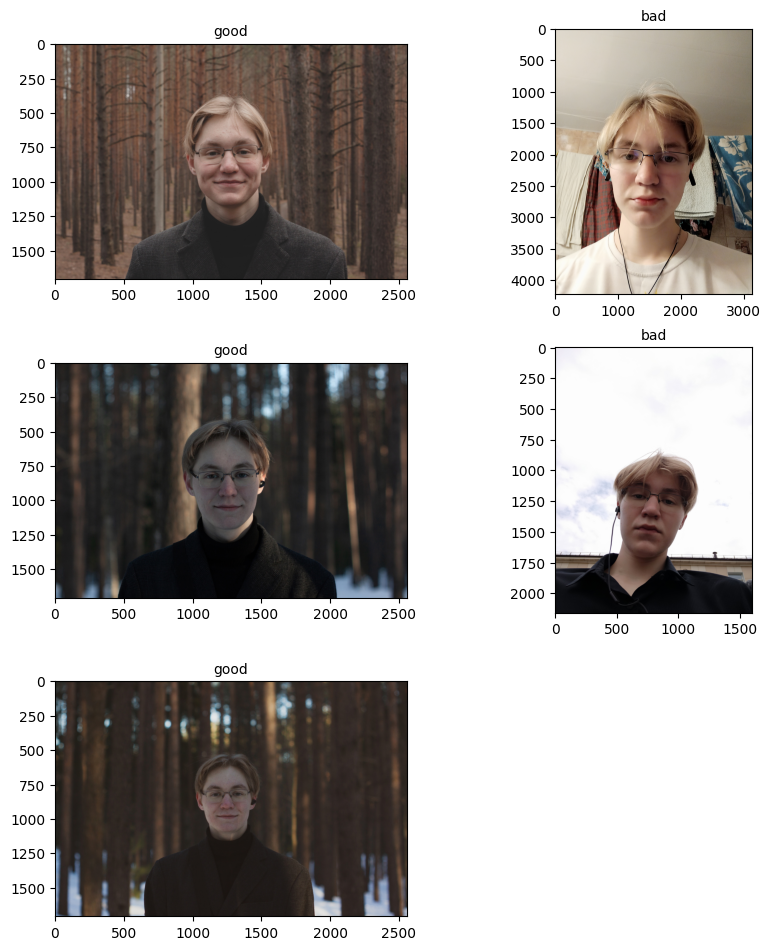

In [9]:
fig = plt.figure(figsize=(10, 20))
rows = 5
columns = 2
c=1
emotions = ['bad', 'good']

with open('./model', 'rb') as f:
    model = pickle.load(f)
dir_test="./test/"
for i_ in os.listdir(dir_test):
    im = os.path.join(dir_test, i_)
    print(im)
    image=cv2.imread(im)
    fig.add_subplot(rows, columns, c)
    face_landmarks = face_m(image)
    output = model.predict([face_landmarks])
    rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.title(emotions[int(output[0])],fontsize=10)
    print(emotions[int(output[0])])
    c+=1
